## **Chapter 2: Tensorflow**
### **Ex3: Multiple Linear Regression**
- Hãy áp dụng Tensor Flow - Multiple Linear Regression để xây dựng model dự đoán petalwidth từ sepallength, sepalwidth, petallength
- Nếu sepallength, sepalwidth, petallength là 4.5, 3.1, 1.6 => petalwidth là bao nhiêu?

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('../data/iris.csv')
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


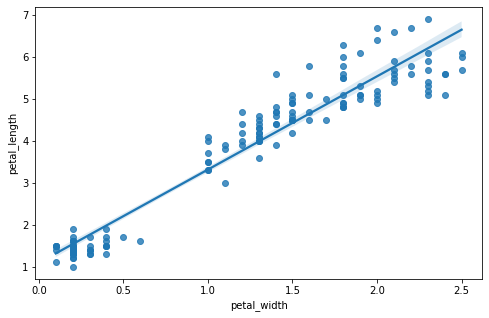

In [4]:
plt.figure(figsize=(8,5))
sns.regplot(data = data, x="petal_width", y="petal_length")
plt.show()

In [21]:
sepal_length = np.array(
    data.sepal_length, np.float32
)  # <=> tf.cast(data.sepal_length, np.float32)
sepal_width = np.array(data.sepal_width, np.float32)
petal_length = np.array(data.petal_length, np.float32)

features = np.array([sepal_length, sepal_width, petal_length])  # features
petal_width = np.array(data.petal_width, np.float32)  # targets

# Define the intercept and slope
intercept = tf.Variable(0.1, np.float32)
slope = tf.Variable([0.1, 0.1, 0.1], np.float32)


In [6]:
def linear_regression(intercept, slope, features):
    temp = 0
    for i in range(len(features)):
        temp = temp + slope[i] * features[i]
    return temp

In [7]:
# Compute the predicted values and loss
def loss_function(intercept, slope, targets, features):
    predictions = linear_regression(intercept, slope, features)
    return tf.keras.losses.mse(targets, predictions)

In [10]:
# Define an optimization operation
opt = tf.keras.optimizers.Adam()

In [16]:
# Minimize the loss function and print the loss
for j in range(1000):
    opt.minimize(
        lambda: loss_function(intercept, slope, petal_width, features),
        var_list=[intercept, slope],
    )
    # print(loss_function(intercept, slope))


In [17]:
# MSE
tf.print(loss_function(intercept, slope, petal_width, features))

0.0364840329


In [18]:
# Print the trained parameters
print(intercept.numpy(), slope.numpy())

0.1 [-0.21908991  0.17178014  0.5204469 ]


In [20]:
# Y = 0.1 -0.21908991*sepal_length + 0.17178014*sepal_width + 0.5204469*petal_length

In [19]:
# sepallength, sepalwidth, petallength là 4.5, 3.1, 1.6
x_new = [4.5, 3.1, 1.6]
y_new = linear_regression(intercept, slope, features = x_new)
tf.print(y_new)

0.379328847
